In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file = 'malditof.txt'
f = open(file)
line = f.readlines()
df = pd.DataFrame(columns=['regime', 'P', 'td', 'No', 'm/z', 'area', 'SNR', 'intensive', 'R'])
for i in range(0, 162, 6):
    regime, P, dt = line[i].split()
    No = 1
    for j in range(i+1, i+6):
        tmp = [regime, int(P), int(dt), No] + list(map(float, line[j].split()))
        df.loc[j-1] = tmp
        No += 1

In [4]:
df

,regime,P,td,No,m/z,area,SNR,intensive,R
0,LIN,50,100,1,1044.9132,460.0,18.6,576.0,666.0
1,LIN,50,100,2,1532.5562,7500.0,48.3,2297.0,534.0
2,LIN,50,100,3,2463.0744,5500.0,31.7,1435.0,730.0
3,LIN,50,100,4,3491.8437,6450.0,13.9,1260.0,602.0
4,LIN,50,100,5,3545.6352,1900.0,5.1,442.0,465.0
6,LIN,60,100,1,1045.0653,3450.0,35.9,1421.0,459.0
7,LIN,60,100,2,1532.6802,18050.0,69.2,5318.0,508.0
8,LIN,60,100,3,2463.0560,9500.0,38.7,2216.0,629.0
9,LIN,60,100,4,3492.4535,16200.0,19.5,2441.0,626.0
10,LIN,60,100,5,3546.3223,4200.0,5.3,700.0,424.0


Text(0.5, 1.0, '$P_{laser}$=80y.e., Regime=LIN')

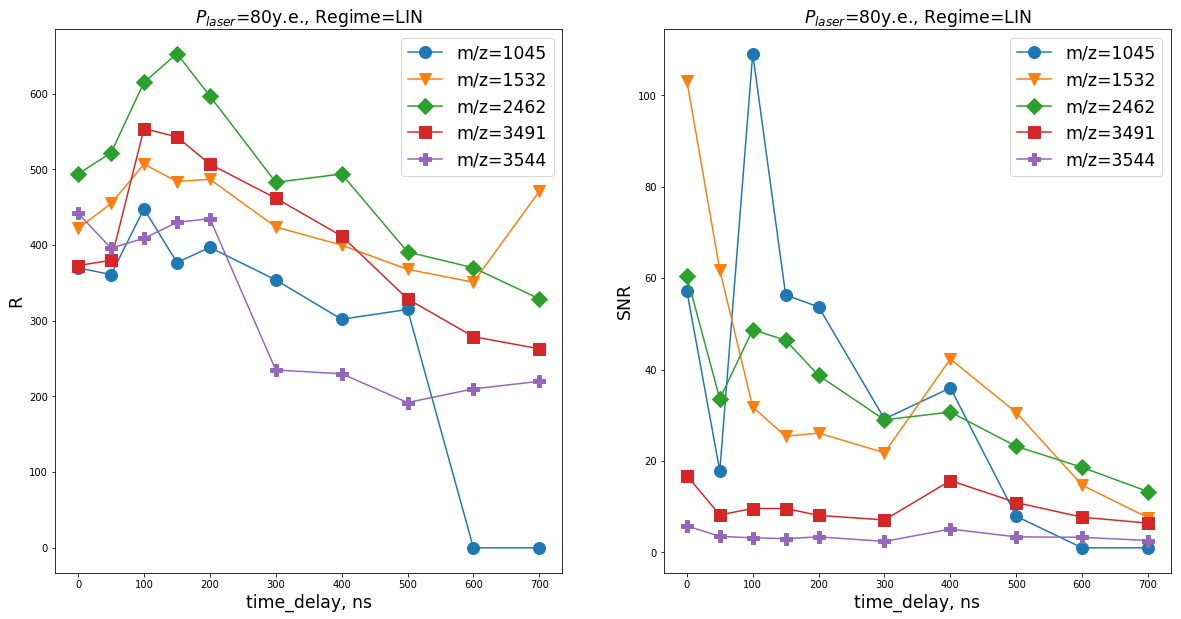

In [5]:
mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='LIN') & (df['P']==80)].reset_index(drop=True)
td = tmp_df['td'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values

markers=['o', 'v', 'D', 's', 'P']
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(len(mz)):
    ax[0].plot(td, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[0].legend(fontsize='xx-large')
ax[0].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[0].set_ylabel('R', fontsize='xx-large')
ax[0].set_title('$P_{laser}$=80y.e., Regime=LIN', fontsize='xx-large')
for i in range(len(mz)):
    ax[1].plot(td, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[1].legend(fontsize='xx-large')
ax[1].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[1].set_ylabel('SNR', fontsize='xx-large')
ax[1].set_title('$P_{laser}$=80y.e., Regime=LIN', fontsize='xx-large')

Text(0.5, 1.0, 'time delay=100ns, Regime=LIN')

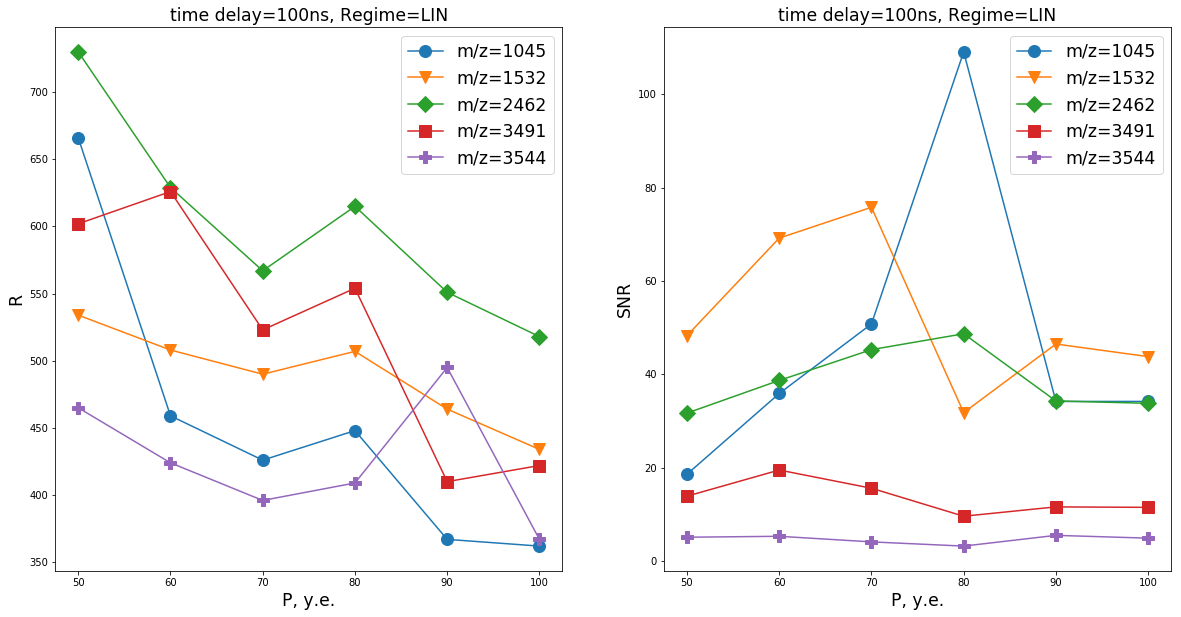

In [6]:
mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='LIN') & (df['td']==100)].reset_index(drop=True)
P = tmp_df['P'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values

markers=['o', 'v', 'D', 's', 'P']
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(len(mz)):
    ax[0].plot(P, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[0].legend(fontsize='xx-large')
ax[0].set_xlabel('P, y.e.', fontsize='xx-large')
ax[0].set_ylabel('R', fontsize='xx-large')
ax[0].set_title('time delay=100ns, Regime=LIN', fontsize='xx-large')
for i in range(len(mz)):
    ax[1].plot(P, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[1].legend(fontsize='xx-large')
ax[1].set_xlabel('P, y.e.', fontsize='xx-large')
ax[1].set_ylabel('SNR', fontsize='xx-large')
ax[1].set_title('time delay=100ns, Regime=LIN', fontsize='xx-large')

Text(0.5, 1.0, '$P_{laser}$=80y.e., Regime=REF')

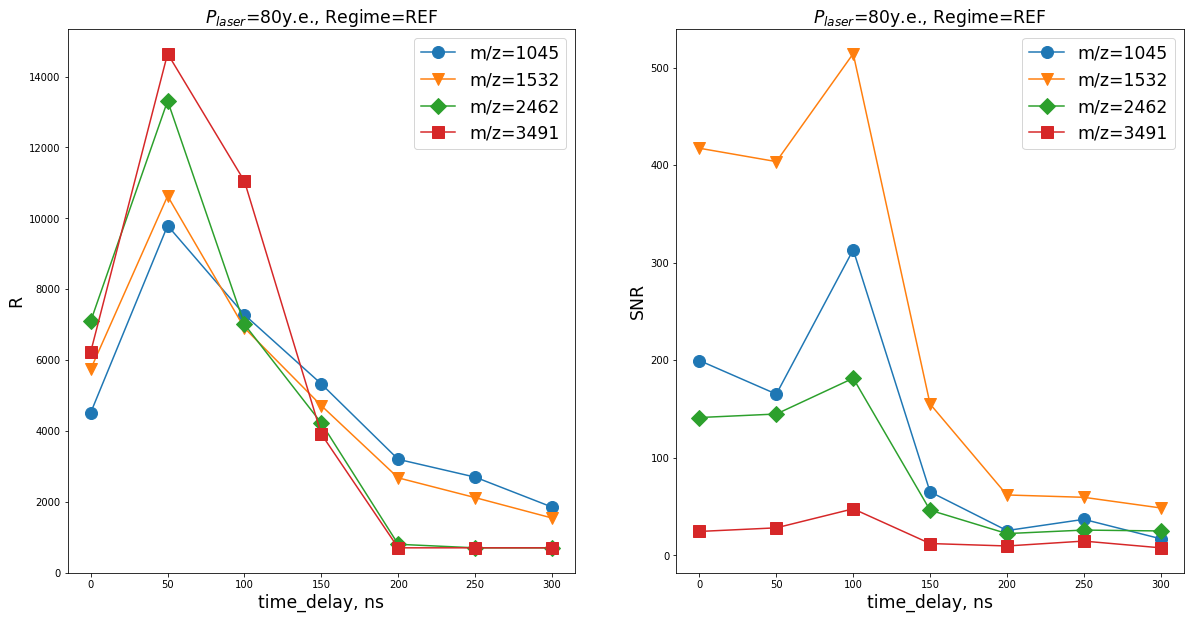

In [57]:
mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='REF') & (df['P']==80)].reset_index(drop=True)
td = tmp_df['td'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values

markers=['o', 'v', 'D', 's', 'P']
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(len(mz)-1):
    ax[0].plot(td, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[0].legend(fontsize='xx-large')
ax[0].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[0].set_ylabel('R', fontsize='xx-large')
ax[0].set_title('$P_{laser}$=80y.e., Regime=REF', fontsize='xx-large')
for i in range(len(mz)-1):
    ax[1].plot(td, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[1].legend(fontsize='xx-large')
ax[1].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[1].set_ylabel('SNR', fontsize='xx-large')
ax[1].set_title('$P_{laser}$=80y.e., Regime=REF', fontsize='xx-large')

Text(0.5, 1.0, 'time delay=100ns, Regime=REF')

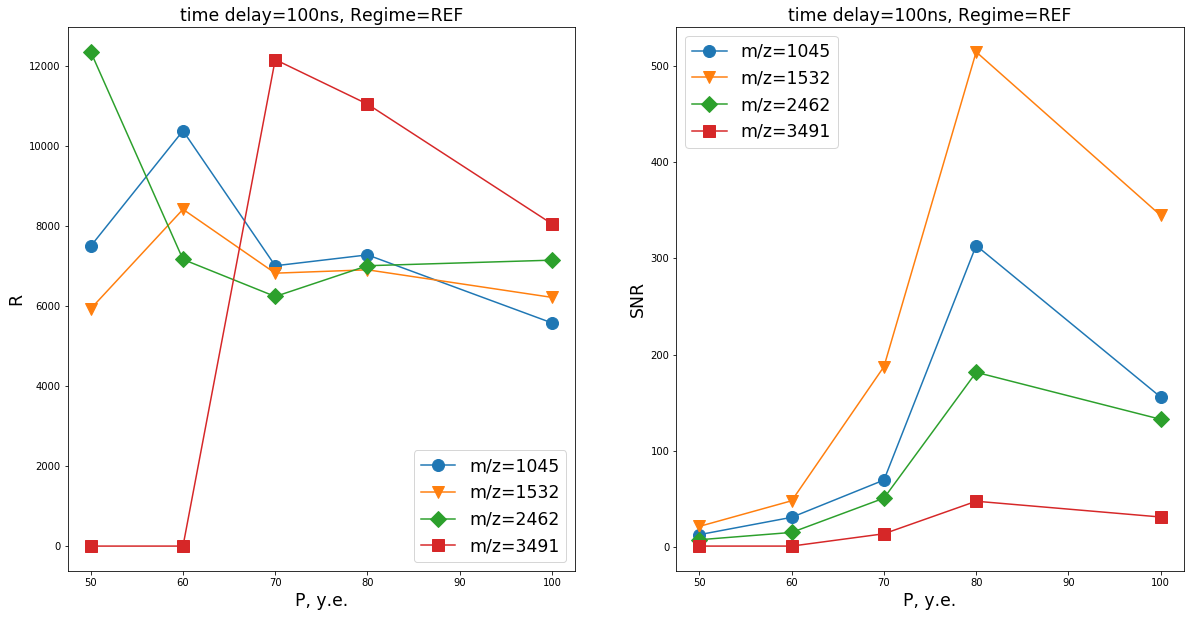

In [51]:
mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='REF') & (df['td']==100)].reset_index(drop=True)
P = tmp_df['P'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values

markers=['o', 'v', 'D', 's', 'P']
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(len(mz)-1):
    ax[0].plot(P, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[0].legend(fontsize='xx-large')
ax[0].set_xlabel('P, y.e.', fontsize='xx-large')
ax[0].set_ylabel('R', fontsize='xx-large')
ax[0].set_title('time delay=100ns, Regime=REF', fontsize='xx-large')
for i in range(len(mz)-1):
    ax[1].plot(P, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[1].legend(fontsize='xx-large')
ax[1].set_xlabel('P, y.e.', fontsize='xx-large')
ax[1].set_ylabel('SNR', fontsize='xx-large')
ax[1].set_title('time delay=100ns, Regime=REF', fontsize='xx-large')

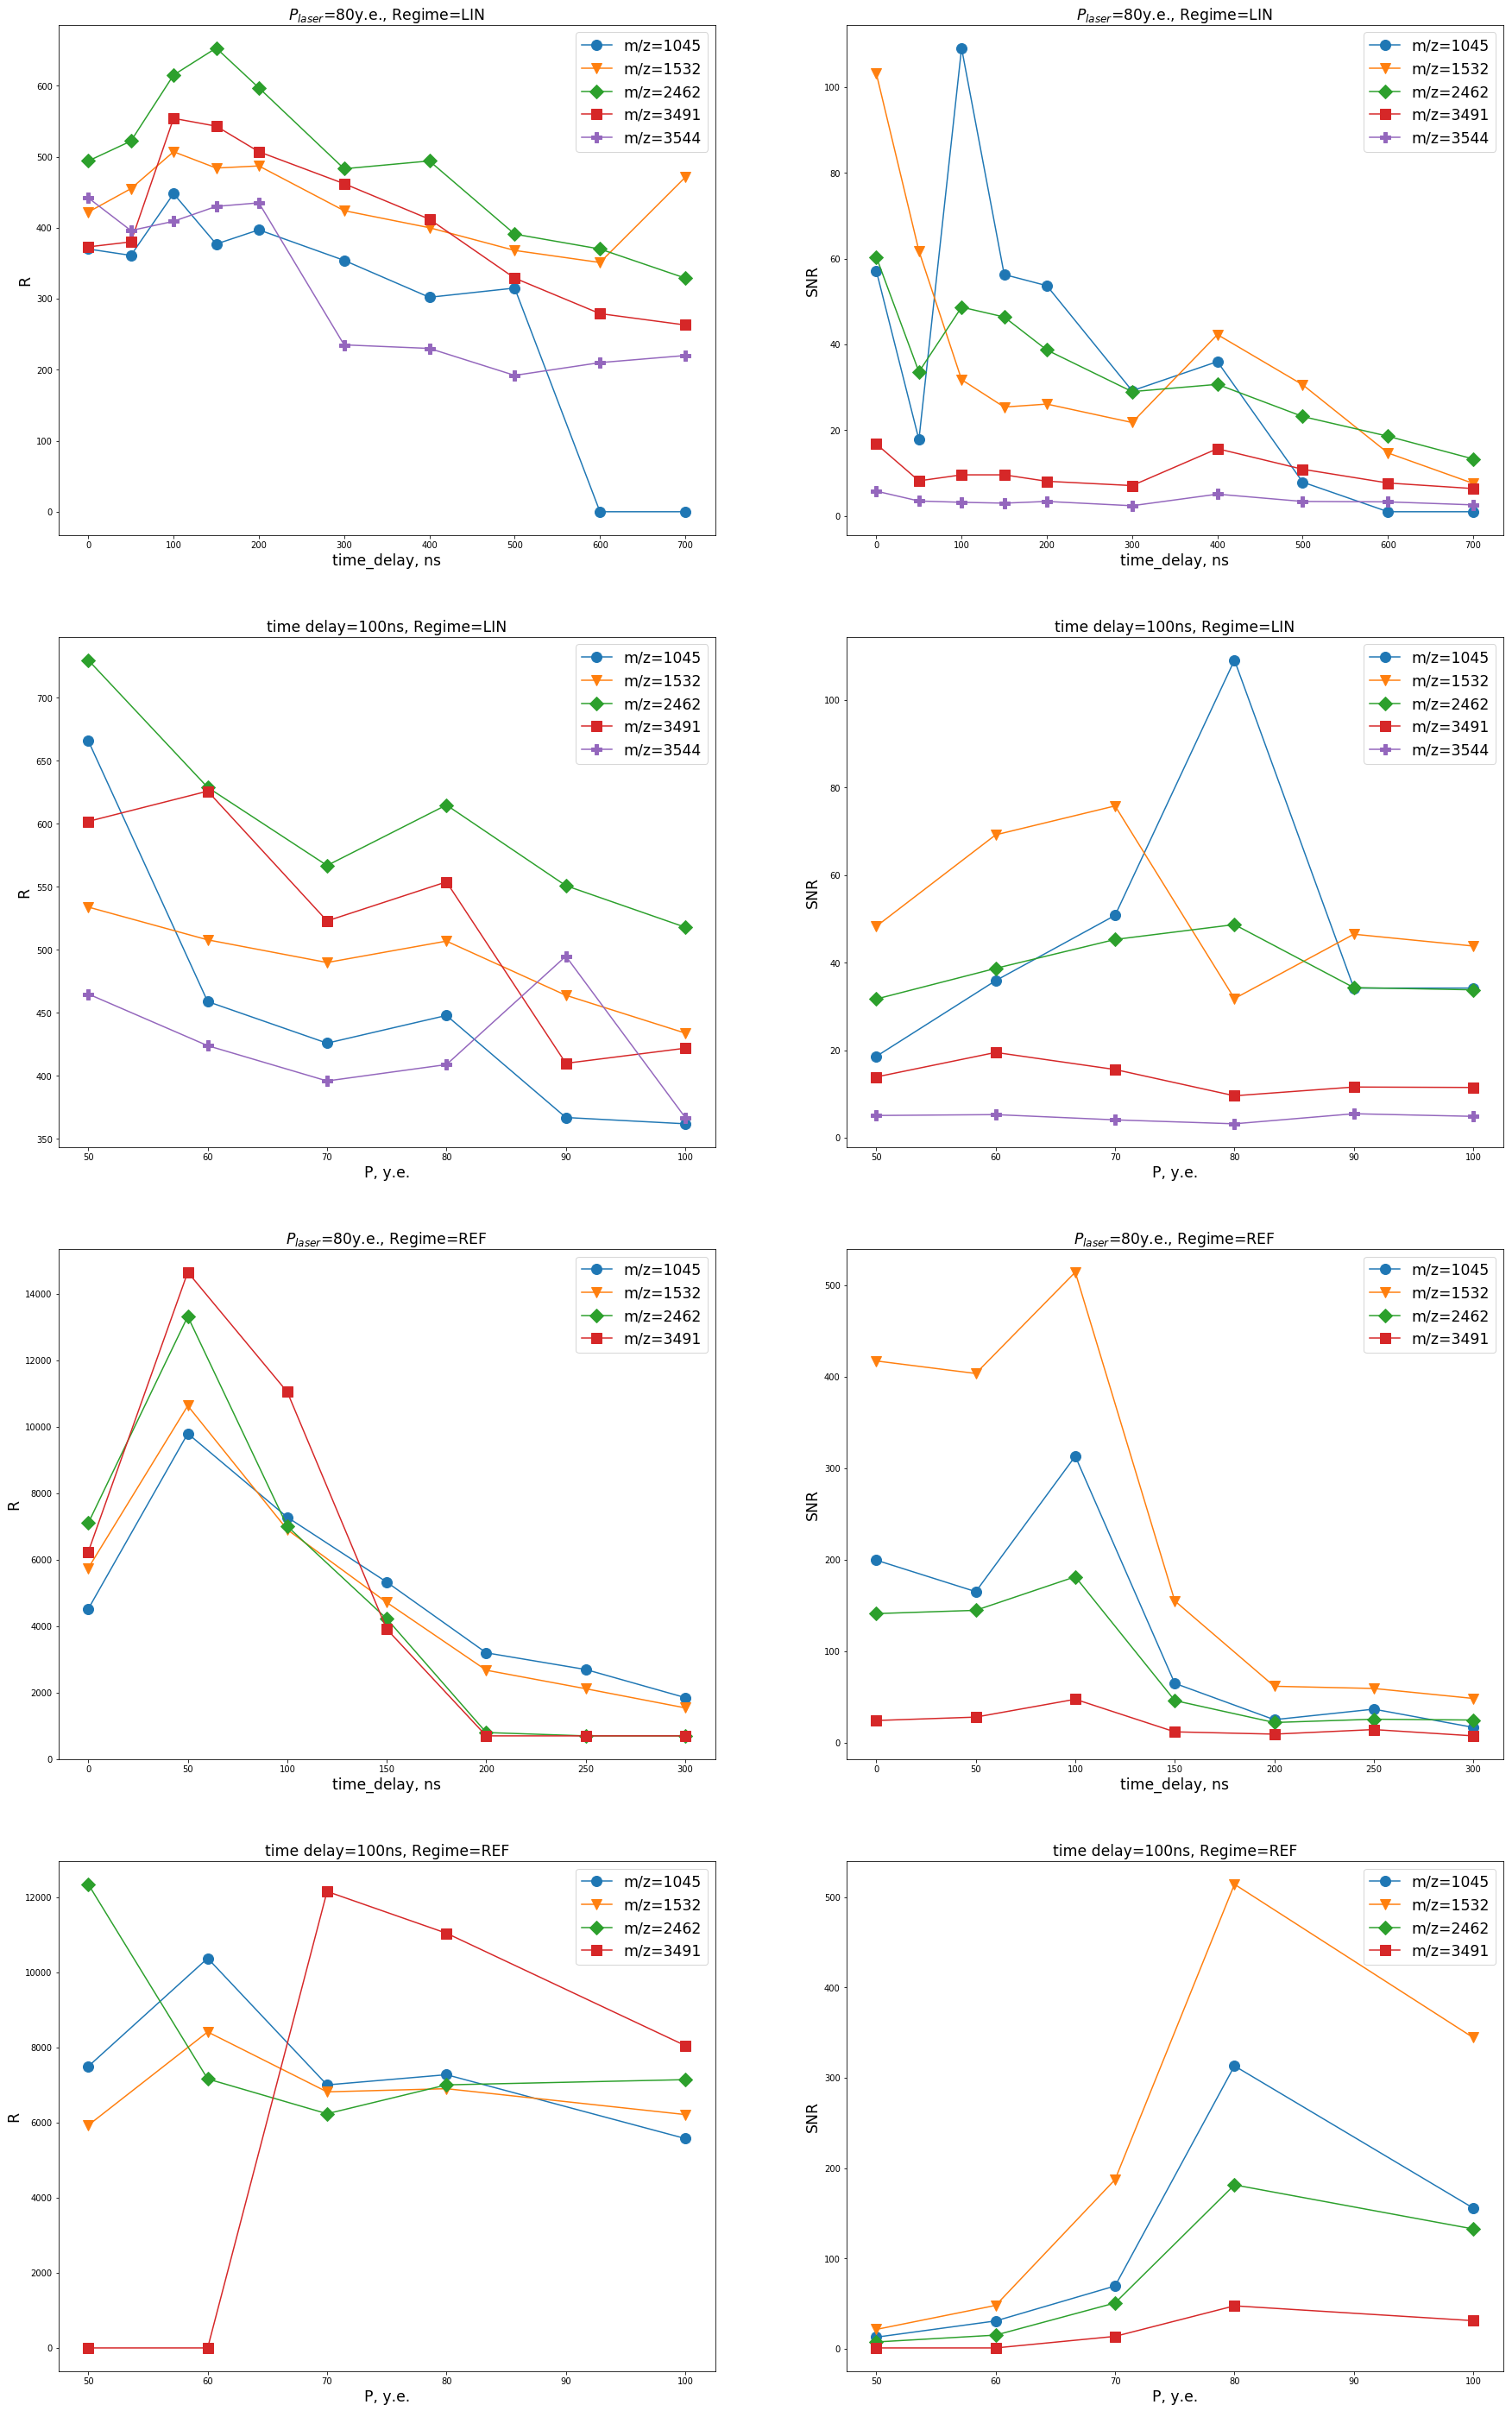

In [61]:
mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='LIN') & (df['P']==80)].reset_index(drop=True)
td = tmp_df['td'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values
fig, ax = plt.subplots(4, 2, figsize=(30, 50))
for i in range(len(mz)):
    ax[0][0].plot(td, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[0][0].legend(fontsize='xx-large')
ax[0][0].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[0][0].set_ylabel('R', fontsize='xx-large')
ax[0][0].set_title('$P_{laser}$=80y.e., Regime=LIN', fontsize='xx-large')
for i in range(len(mz)):
    ax[0][1].plot(td, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[0][1].legend(fontsize='xx-large')
ax[0][1].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[0][1].set_ylabel('SNR', fontsize='xx-large')
ax[0][1].set_title('$P_{laser}$=80y.e., Regime=LIN', fontsize='xx-large')

mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='LIN') & (df['td']==100)].reset_index(drop=True)
P = tmp_df['P'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values
for i in range(len(mz)):
    ax[1][0].plot(P, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[1][0].legend(fontsize='xx-large')
ax[1][0].set_xlabel('P, y.e.', fontsize='xx-large')
ax[1][0].set_ylabel('R', fontsize='xx-large')
ax[1][0].set_title('time delay=100ns, Regime=LIN', fontsize='xx-large')
for i in range(len(mz)):
    ax[1][1].plot(P, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[1][1].legend(fontsize='xx-large')
ax[1][1].set_xlabel('P, y.e.', fontsize='xx-large')
ax[1][1].set_ylabel('SNR', fontsize='xx-large')
ax[1][1].set_title('time delay=100ns, Regime=LIN', fontsize='xx-large')

mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='REF') & (df['P']==80)].reset_index(drop=True)
td = tmp_df['td'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values
for i in range(len(mz)-1):
    ax[2][0].plot(td, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[2][0].legend(fontsize='xx-large')
ax[2][0].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[2][0].set_ylabel('R', fontsize='xx-large')
ax[2][0].set_title('$P_{laser}$=80y.e., Regime=REF', fontsize='xx-large')
for i in range(len(mz)-1):
    ax[2][1].plot(td, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[2][1].legend(fontsize='xx-large')
ax[2][1].set_xlabel('time_delay, ns', fontsize='xx-large')
ax[2][1].set_ylabel('SNR', fontsize='xx-large')
ax[2][1].set_title('$P_{laser}$=80y.e., Regime=REF', fontsize='xx-large')

mz = [1045, 1532, 2462, 3491, 3544]
R_for_mz = [[] for i in range(len(mz))]
snr_for_mz = [[] for i in range(len(mz))]
tmp_df = df[(df['regime']=='REF') & (df['td']==100)].reset_index(drop=True)
P = tmp_df['P'].unique()
for i in range(len(mz)):
    R_for_mz[i] = tmp_df[tmp_df['No']==i+1]['R'].values
    snr_for_mz[i] = tmp_df[tmp_df['No']==i+1]['SNR'].values
for i in range(len(mz)-1):
    ax[3][0].plot(P, R_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[3][0].legend(fontsize='xx-large')
ax[3][0].set_xlabel('P, y.e.', fontsize='xx-large')
ax[3][0].set_ylabel('R', fontsize='xx-large')
ax[3][0].set_title('time delay=100ns, Regime=REF', fontsize='xx-large')
for i in range(len(mz)-1):
    ax[3][1].plot(P, snr_for_mz[i], label='m/z={}'.format(mz[i]), marker=markers[i], markersize=12)
ax[3][1].legend(fontsize='xx-large')
ax[3][1].set_xlabel('P, y.e.', fontsize='xx-large')
ax[3][1].set_ylabel('SNR', fontsize='xx-large')
ax[3][1].set_title('time delay=100ns, Regime=REF', fontsize='xx-large');
plt.savefig('cart.png', dpi=300)

In [12]:
import pyopenms

In [19]:
f = open('peaklist.txt')
peaklist = []
for line in f.readlines():
    peaklist.append(list(map(float, line.split())))
peaklist = np.array(peaklist)

In [20]:
i = 0
for peak in peaklist:
    print(i, peak[0], peak[1])
    i += 1

0 1047.184903 3135.723645
1 1048.18712515 1782.60025492
2 1049.19112086 437.018058939
3 1050.17296129 93.6690168171
4 1109.15803084 247.033649531
5 1110.15682549 125.69812377
6 1111.17804461 157.657991802
7 1112.19519609 66.1905796079
8 1381.25902479 482.951367664
9 1382.22636256 362.571359548
10 1383.21990282 155.923783412
11 1534.809923 7855.896832
12 1535.81628682 7321.71296298
13 1536.82194089 3256.22793769
14 1537.82759547 914.091342354
15 1548.81162366 191.614421316
16 1549.82951473 128.512616307
17 1550.82771386 629.497365103
18 1551.82653145 449.020117518
19 1552.81480925 220.725092933
20 1553.86005239 76.542253247
21 1596.82097069 395.76489201
22 1597.79951136 388.198460674
23 1598.79982526 389.630684663
24 1599.80729968 207.90558883
25 1600.79538216 69.8537406035
26 2466.75775909 1505.87729824
27 2467.761692 2212.492355
28 2468.75816273 1587.54850292
29 2469.7770527 667.601472536
30 2470.75369802 242.60245484
31 3498.887029 517.64368


In [14]:
from pyopenms import *

In [39]:
carbon = ['C{}'.format(n) for n in range(1, 200)]
for i in range(len(carbon)):
    carbon[i] = EmpiricalFormula(carbon[i])
    isotopes = carbon[i].getIsotopeDistribution( CoarseIsotopePatternGenerator(5) )
    print('#', i, carbon[i].toString(),':')
    for iso in isotopes.getContainer():
        print (iso.getMZ(), ":", iso.getIntensity())

# 0 b'C1' :
12.0 : 0.989300012588501
13.0033548378 : 0.010700000450015068
# 1 b'C2' :
24.0 : 0.9787144660949707
25.0033548378 : 0.021171020343899727
26.0067096756 : 0.00011449000157881528
# 2 b'C3' :
36.0 : 0.9682422280311584
37.0033548378 : 0.03141673654317856
38.0067096756 : 0.0003397948748897761
39.010064513399996 : 1.2250430927451816e-06
# 3 b'C4' :
48.0 : 0.9578820466995239
49.0033548378 : 0.04144076630473137
50.0067096756 : 0.0006723180995322764
51.010064513399996 : 4.847740001423517e-06
52.0134193512 : 1.3107960938896213e-08
# 4 b'C5' :
60.0 : 0.9476327300071716
61.0033548378 : 0.05124668776988983
62.0067096756 : 0.001108540571294725
63.010064513399996 : 1.1989673112111632e-05
64.0134193512 : 6.48385238832816e-08
# 5 b'C6' :
72.0 : 0.9374930262565613
73.0033548378 : 0.06083802133798599
74.0067096756 : 0.0016450186958536506
75.0100645134 : 2.37227668549167e-05
76.0134193512 : 1.9243425697368366e-07
# 6 b'C7' :
84.0 : 0.9274618625640869
85.0033548378 : 0.07021822780370712
86.00670

# 194 b'C195' :
2340.0 : 0.13053731620311737
2341.0033548378 : 0.27531197667121887
2342.0067096756 : 0.28883683681488037
2343.0100645134 : 0.20097611844539642
2344.0134193512 : 0.10433775186538696
# 195 b'C196' :
2352.0 : 0.12928490340709686
2353.0033548378 : 0.27406883239746094
2354.0067096756 : 0.2890148162841797
2355.0100645134 : 0.2021418958902359
2356.0134193512 : 0.10548955202102661
# 196 b'C197' :
2364.0 : 0.12804608047008514
2365.0033548378 : 0.2728275954723358
2366.0067096756 : 0.28918129205703735
2367.0100645134 : 0.20330092310905457
2368.0134193512 : 0.10664410889148712
# 197 b'C198' :
2376.0 : 0.12682069838047028
2377.0033548378 : 0.2715883255004883
2378.0067096756 : 0.2893364727497101
2379.0100645134 : 0.20445314049720764
2380.0134193512 : 0.10780134797096252
# 198 b'C199' :
2388.0 : 0.12560860812664032
2389.0033548378 : 0.27035120129585266
2390.0067096756 : 0.2894804775714874
2391.0100645134 : 0.20559853315353394
2392.0134193512 : 0.10896119475364685


In [28]:
def prop(data_set):
    for value in data_set[:, 0]:
        print(value, end=' ')
    print()
    for value in data_set[:, 1]:
        print(value / np.sum(data_set[:, 1]), end=':')

In [29]:
prop(peaklist[:4])

1047.184903 1048.18712515 1049.19112086 1050.17296129 
0.5754665679694152:0.32714198280703943:0.08020135413377028:0.017190095089775034:

In [40]:
carbon = ['C{}'.format(n) for n in range(51, 53)]
for i in range(len(carbon)):
    carbon[i] = EmpiricalFormula(carbon[i])
    isotopes = carbon[i].getIsotopeDistribution( CoarseIsotopePatternGenerator(5) )
    print('#', i, carbon[i].toString(),':')
    for iso in isotopes.getContainer():
        print (iso.getMZ(), ":", iso.getIntensity())

# 0 b'C51' :
612.0 : 0.5778611302375793
613.0033548378 : 0.31874942779541016
614.0067096756 : 0.0861876830458641
615.0100645134 : 0.015225648880004883
616.0134193512 : 0.0019761177245527506
# 1 b'C52' :
624.0 : 0.5716900825500488
625.0033548378 : 0.32152873277664185
626.0067096756 : 0.08867796510457993
627.0100645134 : 0.01598528027534485
628.0134193512 : 0.002117932541295886


c51 или с52 первый пик

In [31]:
prop(peaklist[11:15])

1534.809923 1535.81628682 1536.82194089 1537.82759547 
0.40603295585474725:0.37842359947615833:0.16829852564910547:0.04724491901998902:

In [43]:
carbon = ['C{}'.format(n) for n in range(83, 86)]
for i in range(len(carbon)):
    carbon[i] = EmpiricalFormula(carbon[i])
    isotopes = carbon[i].getIsotopeDistribution( CoarseIsotopePatternGenerator(5) )
    print('#', i, carbon[i].toString(),':')
    for iso in isotopes.getContainer():
        print (iso.getMZ(), ":", iso.getIntensity())

# 0 b'C83' :
996.0 : 0.41030943393707275
997.0033548378 : 0.3683370351791382
998.0067096756 : 0.16333717107772827
999.0100645134 : 0.0476984865963459
1000.0134193512 : 0.010317876935005188
# 1 b'C84' :
1008.0 : 0.4059639573097229
1009.0033548378 : 0.36882686614990234
1010.0067096756 : 0.16554895043373108
1011.0100645134 : 0.048941221088171005
1012.0134193512 : 0.01071903295814991
# 2 b'C85' :
1020.0 : 0.40166619420051575
1021.0033548378 : 0.3692665696144104
1022.0067096756 : 0.1677432507276535
1023.0100645134 : 0.05019467696547508
1024.0134193512 : 0.011129286140203476


с83 с84 второй пик 

In [32]:
prop(peaklist[26:31])

2466.75775909 2467.761692 2468.75816273 2469.7770527 2470.75369802 
0.2422534947034682:0.355928073044125:0.25539210485018876:0.10739838496805057:0.03902794243416745:

In [44]:
carbon = ['C{}'.format(n) for n in range(132, 135)]
for i in range(len(carbon)):
    carbon[i] = EmpiricalFormula(carbon[i])
    isotopes = carbon[i].getIsotopeDistribution( CoarseIsotopePatternGenerator(5) )
    print('#', i, carbon[i].toString(),':')
    for iso in isotopes.getContainer():
        print (iso.getMZ(), ":", iso.getIntensity())

# 0 b'C132' :
1584.0 : 0.24519066512584686
1585.0033548378 : 0.3500528931617737
1586.0067096756 : 0.2479880303144455
1587.0100645134 : 0.11622743308544159
1588.0134193512 : 0.040540970861911774
# 1 b'C133' :
1596.0 : 0.242672398686409
1597.0033548378 : 0.3490822911262512
1598.0067096756 : 0.24918822944164276
1599.0100645134 : 0.11768832057714462
1600.0134193512 : 0.0413687564432621
# 2 b'C134' :
1608.0 : 0.24018211662769318
1609.0033548378 : 0.3480978012084961
1610.0067096756 : 0.2503679096698761
1611.0100645134 : 0.11914811283349991
1612.0134193512 : 0.04220405966043472


c132 c133 c134 третий пик